# Document Layout Analysis

Natural PDF can automatically detect the structure of a document (titles, paragraphs, tables, figures) using layout analysis models. This guide shows how to use this feature.

## Setup

We'll use a sample PDF that includes various layout elements.

/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025-06-14 19:35:06,976] [ WARNING] pdfpage.py:202 - CropBox missing from /Page, defaulting to MediaBox


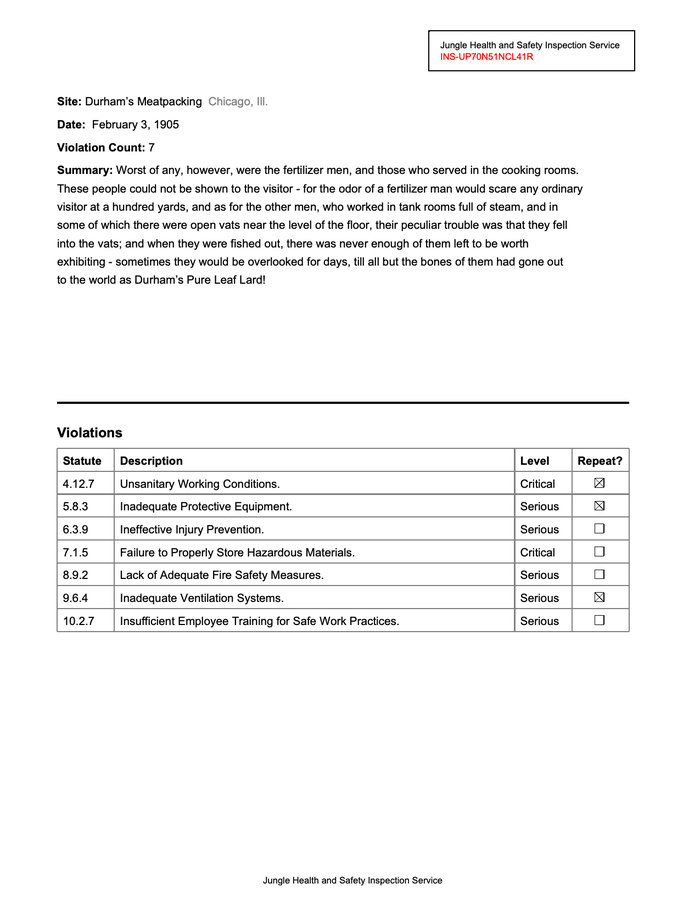

In [1]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

page.to_image(width=700)

## Running Basic Layout Analysis

Use the `analyze_layout()` method. By default, it uses the YOLO model.

In [2]:
# Analyze the layout using the default engine (YOLO)
# This adds 'region' elements to the page
page.analyze_layout()

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpeura41jg/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 1524.5ms


Speed: 4.3ms preprocess, 1524.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 800)


<ElementCollection[Region](count=7)>

In [3]:
# Find all detected regions
regions = page.find_all('region')
len(regions) # Show how many regions were detected

7

In [4]:
first_region = regions[0]
f"First region: type='{first_region.type}', confidence={first_region.confidence:.2f}"

"First region: type='abandon', confidence=0.81"

## Visualizing Detected Layout

Use `highlight()` or `show()` on the detected regions.

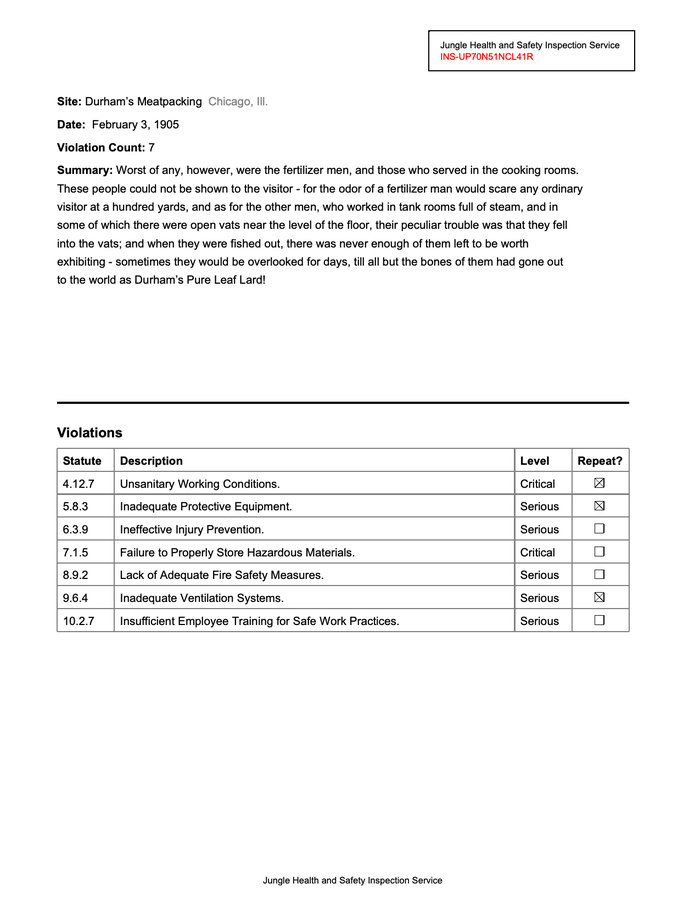

In [5]:
# Highlight all detected regions, colored by type
regions.highlight(group_by='type')
page.to_image(width=700)

## Finding Specific Region Types

Use attribute selectors to find regions of a specific type.

In [6]:
# Find all detected titles
titles = page.find_all('region[type=title]')
titles

<ElementCollection[Region](count=1)>

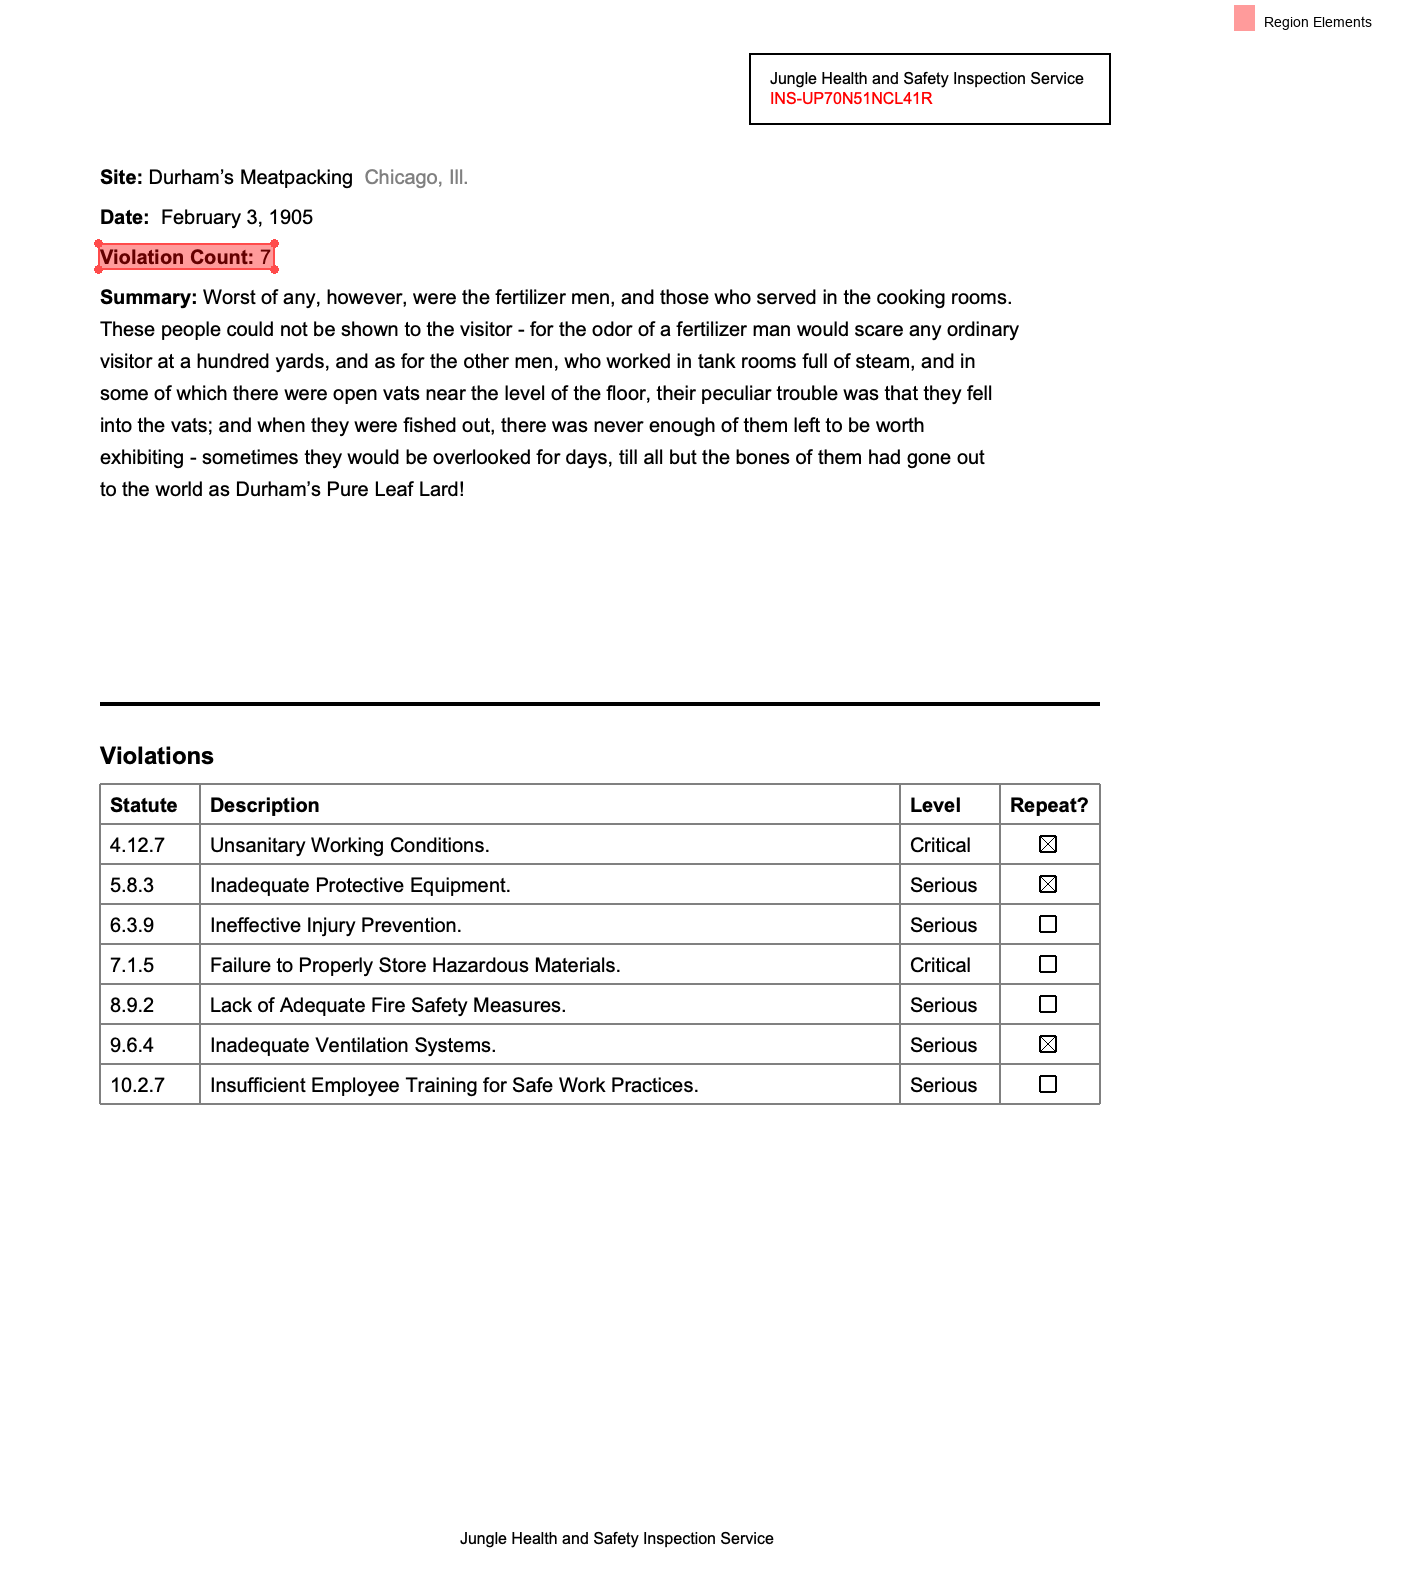

In [7]:
titles.show()

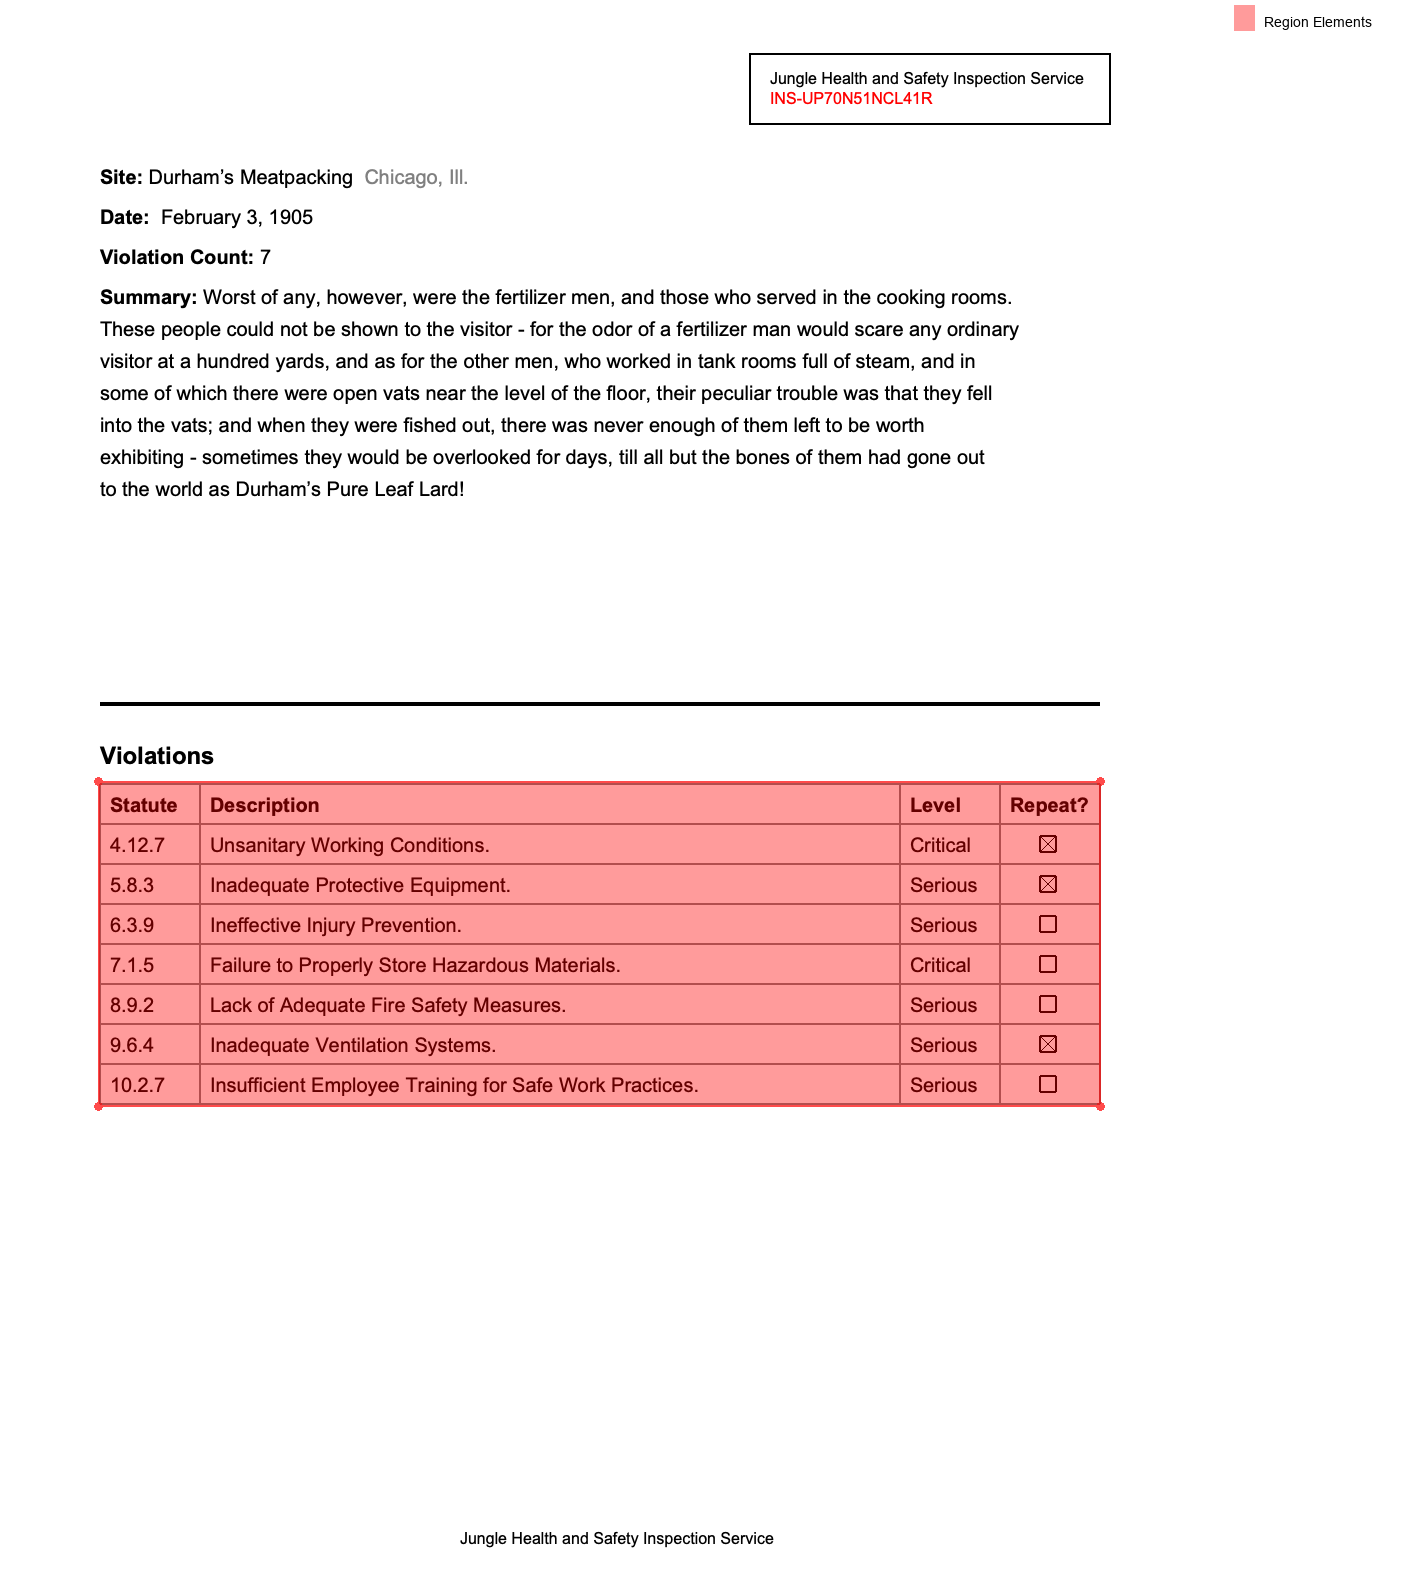

In [8]:
page.find_all('region[type=table]').show()

## Working with Layout Regions

Detected regions are like any other `Region` object. You can extract text, find elements within them, etc.

In [9]:
page.find('region[type=table]').extract_text(layout=True)

'Statute Description Level Repeat?\n4.12.7 Unsanitary Working Conditions. Critical\n5.8.3 Inadequate Protective Equipment. Serious\n6.3.9 Ineffective Injury Prevention. Serious\n7.1.5 Failure to Properly Store Hazardous Materials. Critical\n8.9.2 Lack of Adequate Fire Safety Measures. Serious\n9.6.4 Inadequate Ventilation Systems. Serious\n10.2.7 Insufficient Employee Training for Safe Work Practices. Serious'

## Using Different Layout Models

Natural PDF supports multiple engines (`yolo`, `paddle`, `tatr`). Specify the engine when calling `analyze_layout`.

*Note: Using different engines requires installing the corresponding extras (e.g., `natural-pdf[layout_paddle]`).* `yolo` is the default.

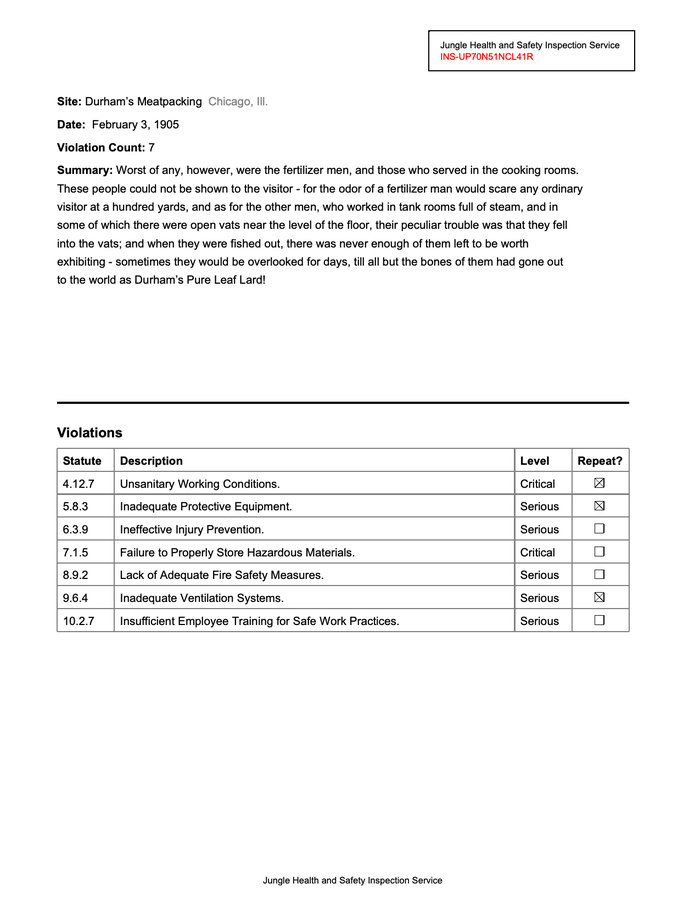

In [10]:
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="paddle")
page.find_all('region[model=paddle]').highlight(group_by='region_type')
page.to_image(width=700)

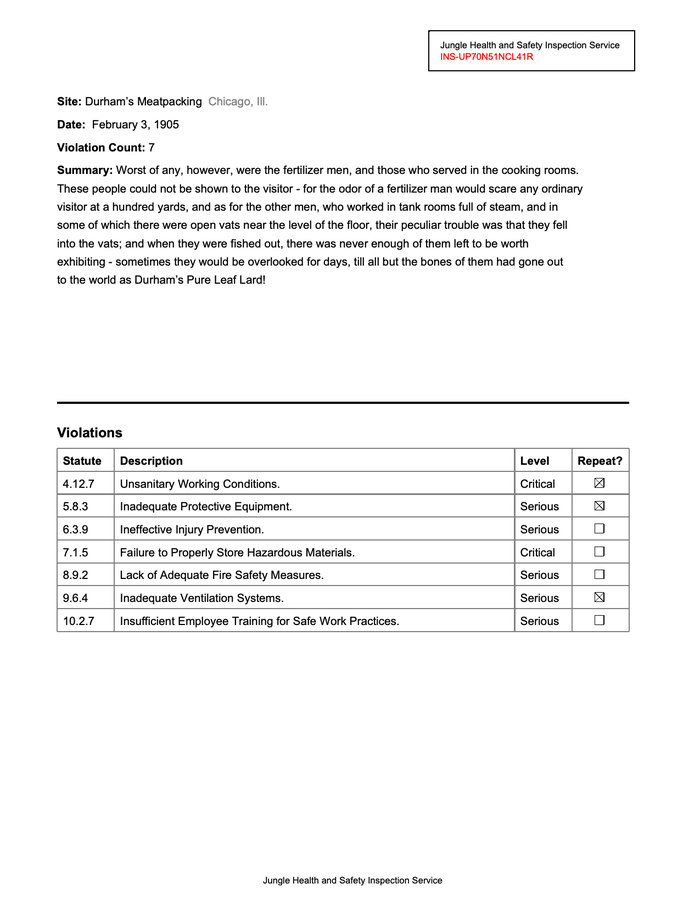

In [11]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="tatr")
page.find_all('region[model=tatr]').highlight(group_by='region_type')
page.to_image(width=700)

[2025-06-14 19:35:14,886] [   ERROR] docling.py:112 - Failed to initialize Docling DocumentConverter: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/docling.py", line 108, in _load_model_from_options
    converter = DocumentConverter(**converter_args)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'


[2025-06-14 19:35:14,887] [   ERROR] base.py:98 - Failed to load model for key DoclingLayoutDetector_cpu_5180380000588298892: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/base.py", line 95, in _get_model
    self._model_cache[cache_key] = self._load_model_from_options(options)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/docling.py", line 108, in _load_model_from_options
    converter = DocumentConverter(**converter_args)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'


[2025-06-14 19:35:14,888] [   ERROR] layout_manager.py:189 - Layout analysis failed for engine 'docling': DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/layout_manager.py", line 181, in analyze_layout
    detections = engine_instance.detect(image, options)  # Pass options directly
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/docling.py", line 139, in detect
    converter = self._get_model(options)
                ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/base.py", line 95, in _get_model
    self._model_cache[cache_key] = self._load_model_from_options(options)
                                   ^^^^^^^^^^^^^^^^

[2025-06-14 19:35:14,888] [   ERROR] layout_analyzer.py:225 -   Layout analysis failed with unexpected error: DocumentConverter.__init__() got an unexpected keyword argument 'model_name'
Traceback (most recent call last):
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/layout_analyzer.py", line 214, in analyze_layout
    detections = self._layout_manager.analyze_layout(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/layout_manager.py", line 181, in analyze_layout
    detections = engine_instance.detect(image, options)  # Pass options directly
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/natural_pdf/analyzers/layout/docling.py", line 139, in detect
    converter = self._get_model(options)
                ^^^^^^^^^^^^^^^^^^^^^^

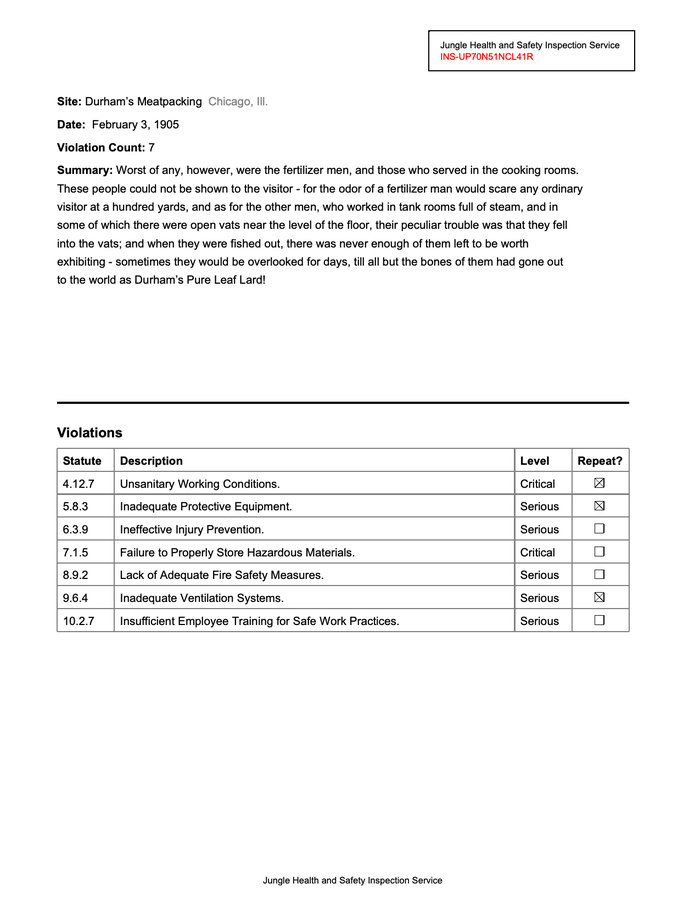

In [12]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="docling")
page.find_all('region[model=docling]').highlight(group_by='region_type')
page.to_image(width=700)

Recognizing layout:   0%|                                                                                     | 0/1 [00:00<?, ?it/s]

Recognizing layout: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]

Recognizing layout: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]

Recognizing tables:   0%|                                                                                     | 0/1 [00:00<?, ?it/s]

Recognizing tables: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]

Recognizing tables: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]

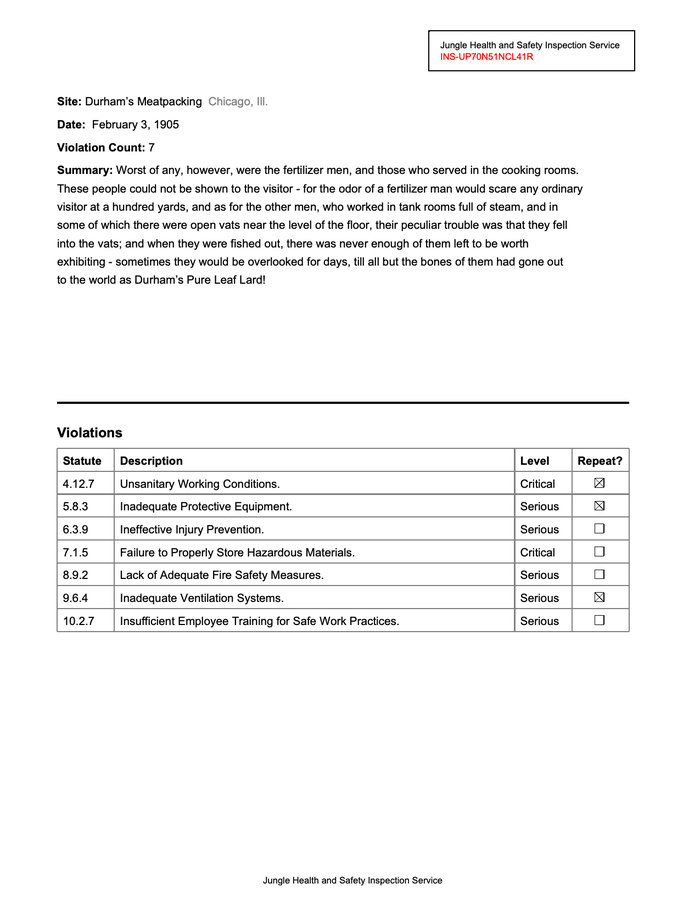

In [13]:
# Analyze using Table Transformer (TATR) - specialized for tables
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="surya")
page.find_all('region[model=surya]').highlight(group_by='region_type')
page.to_image(width=700)

*Note: Calling `analyze_layout` multiple times (even with the same engine) can add duplicate regions. You might want to use `page.clear_detected_layout_regions()` first, or filter by model using `region[model=yolo]`.* 

## Controlling Confidence Threshold

Filter detections by their confidence score.

In [14]:
# Re-run YOLO analysis (clearing previous results might be good practice)
page.clear_detected_layout_regions()
page.analyze_layout(engine="yolo")

# Find only high-confidence regions (e.g., >= 0.8)
high_conf_regions = page.find_all('region[confidence>=0.8]')
len(high_conf_regions)

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmp5mlfthpm/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 1793.3ms


Speed: 5.3ms preprocess, 1793.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 800)


5

## Table Structure with TATR

The TATR engine provides detailed table structure elements (`table`, `table-row`, `table-column`, `table-column-header`). This is very useful for precise table extraction.

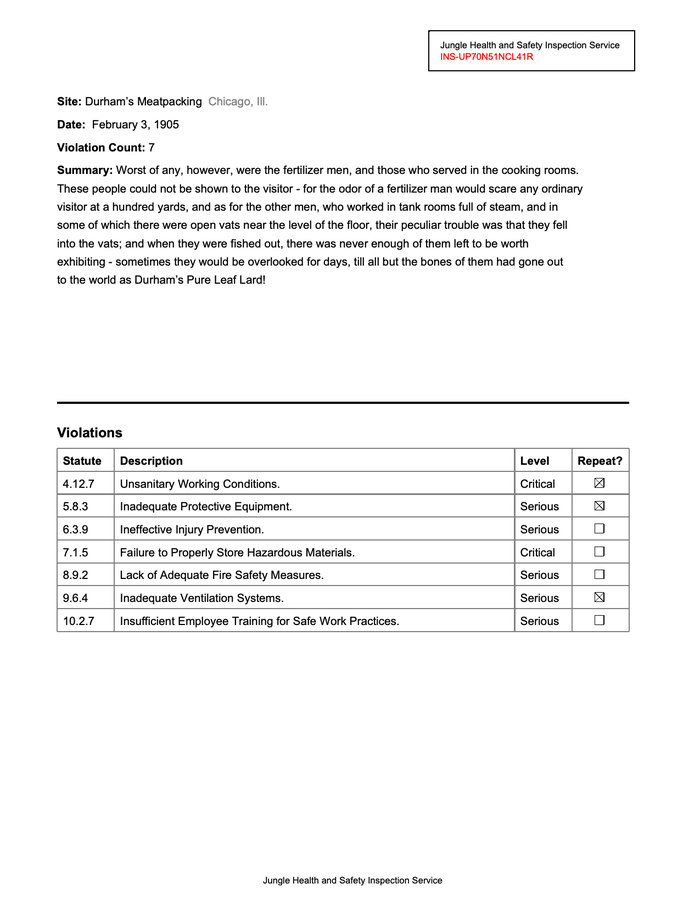

In [15]:
# Ensure TATR analysis has been run
page.clear_detected_layout_regions()
page.clear_highlights()

page.analyze_layout(engine="tatr")
page.find_all('region[model=tatr]').highlight(group_by='region_type')
page.to_image(width=700)

In [16]:
# Find different structural elements from TATR
tables = page.find_all('region[type=table][model=tatr]')
rows = page.find_all('region[type=table-row][model=tatr]')
cols = page.find_all('region[type=table-column][model=tatr]')
hdrs = page.find_all('region[type=table-column-header][model=tatr]')

f"Found: {len(tables)} tables, {len(rows)} rows, {len(cols)} columns, {len(hdrs)} headers (from TATR)"

'Found: 2 tables, 8 rows, 4 columns, 1 headers (from TATR)'

### Enhanced Table Extraction with TATR

When a `region[type=table]` comes from the TATR model, `extract_table()` can use the underlying row/column structure for more robust extraction.

In [17]:
# Find the TATR table region again
tatr_table = page.find('region[type=table][model=tatr]')

# This extraction uses the detected rows/columns
tatr_table.extract_table()

[['Statute Description Level Repeat?'],
 ['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

if you'd like the normal approach instead of the "intelligent" one, you can ask for pdfplumber.

In [18]:
# This extraction uses the detected rows/columns
tatr_table.extract_table(method='pdfplumber')

[['Unsanitary Working Conditions.', 'Critical'],
 ['Inadequate Protective Equipment.', 'Serious'],
 ['Ineffective Injury Prevention.', 'Serious'],
 ['Failure to Properly Store Hazardous Materials.', 'Critical'],
 ['Lack of Adequate Fire Safety Measures.', 'Serious'],
 ['Inadequate Ventilation Systems.', 'Serious']]

## Using Gemini for Layout Analysis (Advanced)

Natural PDF supports layout analysis using Google's Gemini models via an OpenAI-compatible API. This is an advanced feature and requires you to provide your own OpenAI client, API key, and endpoint.

**Example usage:**

```py
from openai import OpenAI
from natural_pdf import PDF
from natural_pdf.analyzers.layout.layout_options import GeminiLayoutOptions

# Create a compatible OpenAI client for Gemini
client = OpenAI(
    api_key="YOUR_GOOGLE_API_KEY",
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

options = GeminiLayoutOptions(
    model_name="gemini-2.0-flash",
    client=client,
    classes=["text", "title"]
)

pdf = PDF("your.pdf")
page = pdf.pages[0]
regions = page.analyze_layout(engine="gemini", options=options)
```

- You must provide your own API key and endpoint for Gemini.
- The client must be compatible with the OpenAI API (see the `openai` Python package).
- This feature is intended for advanced users who need LLM-based layout analysis.

## Next Steps

Layout analysis provides regions that you can use for:

- [Table Extraction](../tables/index.ipynb): Especially powerful with TATR regions.
- [Text Extraction](../text-extraction/index.ipynb): Extract text only from specific region types (e.g., paragraphs).
- [Document QA](../document-qa/index.ipynb): Focus question answering on specific detected regions.